In [1]:
import pandas as pd
import numpy as np
import km
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [77]:
dfList=[]
fileList = ['APEAL data\\16_US_APEAL_SPSS.csv','APEAL data\\15_US_APEAL_SPSS.csv','APEAL data\\14_US_APEAL_SPSS.csv']
for f in fileList:
#load data from SPSS into dataframe
    print(f)
    df = pd.read_csv(f,error_bad_lines=False)
    #df.columns = df.iloc[0]
    #df = df.reindex(df.index.drop(0))
    dropList=['ID', 'WT']
    df = df.drop(dropList, axis=1)
    df=df.replace(99,np.nan)
    if 'Make_Series' not in list(df.columns):
        df=df.rename(columns = {'MakeSeries':'Make_Series'})
    
    if 'Demo_Height' not in list(df.columns):
        df=df.rename(columns = {'Demo_Height_Inch':'Demo_Height'})
    dfList.append(df)

APEAL data\16_US_APEAL_SPSS.csv
APEAL data\15_US_APEAL_SPSS.csv
APEAL data\14_US_APEAL_SPSS.csv


In [78]:
df = dfList[0]

In [79]:
df

,OEM_Corporation,Make,Make_Premium_Non_Premium,Make_Series,Make_Model_and_Type,Segment,Super_Segment,Sub_Origin,Sub_Sub_Origin,PLANTASSEMBLY2,...,DEMO_INCM_1,DEMO_INCM_1X_98,DEMO_HWGT_1A,DEMO_HWGT_1B,DEMO_HWGT_1C,DEMO_HWGT_1X_98,Demo_Height,CONL_US_1X_99,Demo_Census_4,Demo_Census_9
0,General Motors Company,Cadillac,Premium,Cadillac CTS,Cadillac CTS 4dr Sdn,Midsize Premium Car,Midsize Premium,Domestic,Domestic,"Lansing, MI (Grand River)",...,13.0,0.0,5.0,10.0,200.0,0.0,70.0,0.0,3,5
1,General Motors Company,Cadillac,Premium,Cadillac CTS,Cadillac CTS 4dr Sdn,Midsize Premium Car,Midsize Premium,Domestic,Domestic,"Lansing, MI (Grand River)",...,10.0,0.0,5.0,2.0,115.0,0.0,62.0,0.0,3,5
2,General Motors Company,Cadillac,Premium,Cadillac CTS,Cadillac CTS 4dr Sdn,Midsize Premium Car,Midsize Premium,Domestic,Domestic,"Lansing, MI (Grand River)",...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,0.0,3,5
3,General Motors Company,Cadillac,Premium,Cadillac Escalade,Cadillac Escalade 4dr SUV,Large Premium SUV,Large Premium,Domestic,Domestic,"Arlington, TX",...,15.0,0.0,6.0,0.0,225.0,0.0,72.0,1.0,3,5
4,General Motors Company,Cadillac,Premium,Cadillac SRX,Cadillac SRX 4dr SUV,Midsize Premium SUV,Midsize Premium,Domestic,Domestic,"Ramos Arizpe, Mexico",...,14.0,0.0,5.0,8.0,185.0,0.0,68.0,1.0,2,3
5,General Motors Company,Cadillac,Premium,Cadillac SRX,Cadillac SRX 4dr SUV,Midsize Premium SUV,Midsize Premium,Domestic,Domestic,"Ramos Arizpe, Mexico",...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,0.0,3,5
6,General Motors Company,Cadillac,Premium,Cadillac SRX,Cadillac SRX 4dr SUV,Midsize Premium SUV,Midsize Premium,Domestic,Domestic,"Ramos Arizpe, Mexico",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
7,General Motors Company,Cadillac,Premium,Cadillac CTS,Cadillac CTS 4dr Sdn,Midsize Premium Car,Midsize Premium,Domestic,Domestic,"Lansing, MI (Grand River)",...,NaN,1.0,5.0,4.0,107.0,0.0,64.0,0.0,3,7
8,General Motors Company,Cadillac,Premium,Cadillac XTS,Cadillac XTS 4dr Sdn,Midsize Premium Car,Midsize Premium,Domestic,Domestic,"Oshawa Flex Line, Canada",...,NaN,1.0,5.0,10.0,170.0,0.0,70.0,0.0,1,2
9,General Motors Company,Cadillac,Premium,Cadillac XTS,Cadillac XTS 4dr Sdn,Midsize Premium Car,Midsize Premium,Domestic,Domestic,"Oshawa Flex Line, Canada",...,14.0,0.0,5.0,7.0,180.0,0.0,67.0,1.0,3,7


In [80]:
df['Segment'].unique()

array(['Midsize Premium Car', 'Large Premium SUV', 'Midsize Premium SUV',
       'Large SUV', 'Midsize Pickup', 'Midsize Premium Sporty Car',
       'Compact Car', 'Compact SUV', 'Midsize Car', 'Large Car',
       'Large Light Duty Pickup', 'Small Car', 'Midsize SUV',
       'Large Heavy Duty Pickup', 'Small SUV', 'Minivan',
       'Midsize Sporty Car', 'Compact Premium Sporty Car',
       'Compact Premium SUV', 'Small Premium Car', 'Compact Premium Car',
       'Compact Sporty Car', 'Compact Multi-Purpose Vehicle',
       'Small Premium SUV', 'Large Premium Car', 'City Car'], dtype=object)

Create distance graph of variables based on average histogram

In [81]:
varList=['Make','Make_Series','Segment','DEMO_INCM_1','VEXT_R_1','VEXT_R_2','VEXT_R_3','VEXT_R_4','VEXT_R_5','VEXT_R_6','VEXT_R_7','VINT_R_1','VINT_R_2','VINT_R_3','VINT_R_4','VINT_R_5','VINT_R_6','VINT_R_7','VINT_R_8','VINT_R_9','VINT_R_10','VINT_R_11','VSS_R_1','VSS_R_2','VSS_R_3','VSS_R_4','VSS_R_5','VSS_R_7','VSS_R_9','VSS_R_10','VSS_R_11','VSS_R_12','VAEN_R_1','VAEN_R_2','VAEN_R_3','VAEN_R_4','VAEN_R_5','VAEN_R_6','VAEN_R_7','VAEN_R_8','VAEN_R_9','VAEN_R_10','VAEN_R_11','VAEN_R_12','VAEN_R_13','VAEN_R_14','VAEN_R_15','VAEN_R_16','VAEN_R_17','VSEAT_R_1','VSEAT_R_2','VSEAT_R_3','VSEAT_R_4','VSEAT_R_5','VSEAT_R_6','VSEAT_R_7','VSEAT_R_8','VSEAT_R_9','VSEAT_R_10','VSEAT_R_11','VSEAT_R_12','VHVAC_R_1','VHVAC_R_2','VHVAC_R_3','VHVAC_R_4','VHVAC_R_5','VHVAC_R_6','VHVAC_R_7','VDRD_R_1','VDRD_R_2','VDRD_R_3','VDRD_R_4','VDRD_R_5','VDRD_R_6','VDRD_R_7','VDRD_R_8','VDRD_R_9','VDRD_R_10','VENT_R_1','VENT_R_2','VENT_R_3','VENT_R_4','VENT_R_5','VENT_R_6','VVDS_R_1','VVDS_R_2','VVDS_R_3','VVDS_R_4','VVDS_R_5','VVDS_R_6','VVDS_R_7','VVDS_R_8','VFUEL_R_1','VFUEL_R_2','VFUEL_R_3']
dfs=df[varList].applymap(str)

In [121]:
#question distance from average question probability distribution for specific category
filCategory = 'Segment'
fil = 'Large Light Duty Pickup'
dfModel = dfs[dfs[filCategory]==fil].drop(['Make','Make_Series','Segment','DEMO_INCM_1'], axis=1)
#overall question distance from average question probability distribution
#dfModel = dfs.drop(['Make','Make_Series','Segment','DEMO_INCM_1'], axis=1)
#probDist = {}
#for i in list(dfModel.columns):
countMatrix = dfModel.apply(pd.value_counts).fillna(0)
#probDist[i] = 
if 'nan' in list(countMatrix.index):
        countMatrix=countMatrix.drop('nan')

countMatrix

,VEXT_R_1,VEXT_R_2,VEXT_R_3,VEXT_R_4,VEXT_R_5,VEXT_R_6,VEXT_R_7,VINT_R_1,VINT_R_2,VINT_R_3,...,VVDS_R_2,VVDS_R_3,VVDS_R_4,VVDS_R_5,VVDS_R_6,VVDS_R_7,VVDS_R_8,VFUEL_R_1,VFUEL_R_2,VFUEL_R_3
1.0,0.0,0.0,0.0,9,2.0,1,0.0,1,0.0,4,...,2,4,1.0,2,0.0,0.0,0.0,30,14,21
10.0,993.0,901.0,851.0,876,988.0,841,890.0,922,855.0,894,...,947,843,904.0,685,731.0,1000.0,798.0,282,418,327
2.0,5.0,1.0,1.0,5,0.0,8,0.0,4,3.0,3,...,4,7,0.0,10,4.0,0.0,0.0,37,14,28
3.0,4.0,0.0,5.0,16,3.0,6,1.0,13,12.0,9,...,19,7,11.0,37,16.0,2.0,5.0,119,49,69
4.0,22.0,22.0,37.0,67,37.0,58,11.0,43,69.0,54,...,70,76,44.0,93,82.0,29.0,39.0,264,178,210
5.0,46.0,54.0,64.0,84,49.0,76,37.0,71,81.0,77,...,77,104,65.0,116,124.0,51.0,75.0,272,208,243
6.0,118.0,149.0,147.0,136,113.0,138,126.0,146,169.0,146,...,115,153,131.0,184,179.0,112.0,163.0,325,299,319
7.0,260.0,288.0,312.0,287,272.0,284,270.0,269,279.0,276,...,267,276,280.0,300,286.0,272.0,271.0,287,312,327
8.0,249.0,279.0,281.0,252,225.0,255,271.0,242,257.0,264,...,243,251,258.0,290,284.0,224.0,275.0,280,321,300
9.0,425.0,429.0,422.0,389,433.0,449,522.0,411,397.0,394,...,377,396,429.0,406,395.0,431.0,502.0,219,300,284


In [122]:
#Calculate probability distribution, put in probDist
for t in list(countMatrix.columns):
    if countMatrix[t].sum()<60:
        print(t)
        countMatrix = countMatrix.drop(t,axis=1)
probDist = countMatrix/countMatrix.sum()

VSS_R_4
VAEN_R_15
VSEAT_R_7


In [123]:
#find distance from average probability distribution with vectorized operations
s = countMatrix.sum(axis=1)
avgProbDist = s/s.sum()
t=np.sqrt(probDist.T*avgProbDist).sum(axis=1)
#t=t[t!=0]
d = np.log(t)*-1
distFromAvg = pd.DataFrame(d, columns=['distance'])
#calculate average for each question
avgs = np.dot(probDist.T,np.array(probDist.index).astype(np.float))
distFromAvg['average'] = avgs

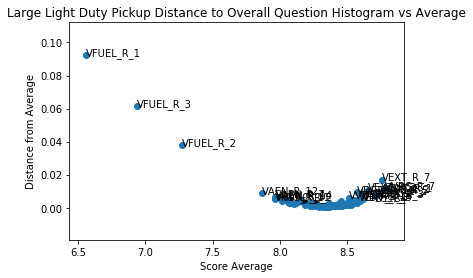

In [124]:
plt.scatter(distFromAvg['average'],distFromAvg['distance'])
plt.xlabel('Score Average')
plt.ylabel('Distance from Average')
plt.title('Large Light Duty Pickup Distance to Overall Question Histogram vs Average')
for txt in list(distFromAvg.index):
    if distFromAvg.loc[txt,'distance']>.005:
        plt.annotate(txt, (distFromAvg.loc[txt,'average'],distFromAvg.loc[txt,'distance']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000037B35EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003F3B7E10>]], dtype=object)

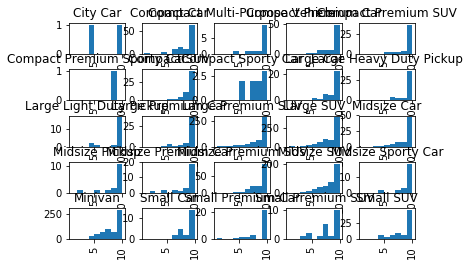

In [11]:
var='VAEN_R_15'
ddff = df[[filCategory,var]].dropna()
ddff.apply(pd.to_numeric, errors='ignore').hist(by='Segment',column=var,bins=range(1,11))

Create distance graph based on demographic variable

In [12]:
varList=['Segment','Demo_Census_9','VEXT_R_1','VEXT_R_2','VEXT_R_3','VEXT_R_4','VEXT_R_5','VEXT_R_6','VEXT_R_7','VINT_R_1','VINT_R_2','VINT_R_3','VINT_R_4','VINT_R_5','VINT_R_6','VINT_R_7','VINT_R_8','VINT_R_9','VINT_R_10','VINT_R_11','VSS_R_1','VSS_R_2','VSS_R_3','VSS_R_4','VSS_R_5','VSS_R_7','VSS_R_9','VSS_R_10','VSS_R_11','VSS_R_12','VAEN_R_1','VAEN_R_2','VAEN_R_3','VAEN_R_4','VAEN_R_5','VAEN_R_6','VAEN_R_7','VAEN_R_8','VAEN_R_9','VAEN_R_10','VAEN_R_11','VAEN_R_12','VAEN_R_13','VAEN_R_14','VAEN_R_15','VAEN_R_16','VAEN_R_17','VSEAT_R_1','VSEAT_R_2','VSEAT_R_3','VSEAT_R_4','VSEAT_R_5','VSEAT_R_6','VSEAT_R_7','VSEAT_R_8','VSEAT_R_9','VSEAT_R_10','VSEAT_R_11','VSEAT_R_12','VHVAC_R_1','VHVAC_R_2','VHVAC_R_3','VHVAC_R_4','VHVAC_R_5','VHVAC_R_6','VHVAC_R_7','VDRD_R_1','VDRD_R_2','VDRD_R_3','VDRD_R_4','VDRD_R_5','VDRD_R_6','VDRD_R_7','VDRD_R_8','VDRD_R_9','VDRD_R_10','VENT_R_1','VENT_R_2','VENT_R_3','VENT_R_4','VENT_R_5','VENT_R_6','VVDS_R_1','VVDS_R_2','VVDS_R_3','VVDS_R_4','VVDS_R_5','VVDS_R_6','VVDS_R_7','VVDS_R_8','VFUEL_R_1','VFUEL_R_2','VFUEL_R_3']
dfs=df[varList].applymap(str)

In [13]:
probDist = {}
splitVar = 'Demo_Census_9'
incomeList = dfs[splitVar].unique()
temp = dfs.drop(['Segment',splitVar],axis=1).apply(pd.value_counts).fillna(0)
temp=temp.drop('nan')
allDist = temp/temp.sum() 
for i in incomeList:
    temp = dfs[dfs[splitVar]==i].drop(['Segment',splitVar],axis=1).apply(pd.value_counts).fillna(0)
    if 'nan' in list(temp.index):
        temp=temp.drop('nan')
    probDist[i] = temp/temp.sum()

In [14]:
distanceDict={}
for i in incomeList:
    t=np.sqrt(probDist[i]*allDist).sum()
    d = np.log(t)*-1
    distFromAvg = pd.DataFrame(d, columns=['distance'])
    avgs = np.dot(probDist[i].T,np.array(probDist[i].index).astype(np.float))
    distFromAvg['average'] = avgs
    distanceDict[i]=distFromAvg

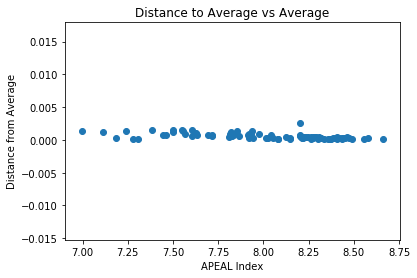

In [15]:
distFromAvg = distanceDict['9']
plt.scatter(distFromAvg['average'],distFromAvg['distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Average')
plt.title('Distance to Average vs Average')
for txt in list(distFromAvg.index):
    if distFromAvg.loc[txt,'distance']>.005:
        plt.annotate(txt, (distFromAvg.loc[txt,'average'],distFromAvg.loc[txt,'distance']))

In [16]:
distFromAvg

,distance,average
VEXT_R_1,0.000333,8.475448
VEXT_R_2,0.000118,8.490682
VEXT_R_3,0.000267,8.319254
VEXT_R_4,0.000388,8.309053
VEXT_R_5,0.000168,8.661227
VEXT_R_6,0.000190,8.334163
VEXT_R_7,0.000253,8.580204
VINT_R_1,0.000282,8.432430
VINT_R_2,0.000379,8.247882
VINT_R_3,0.000274,8.211472


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000735F7F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000008A3FC1D0>]], dtype=object)

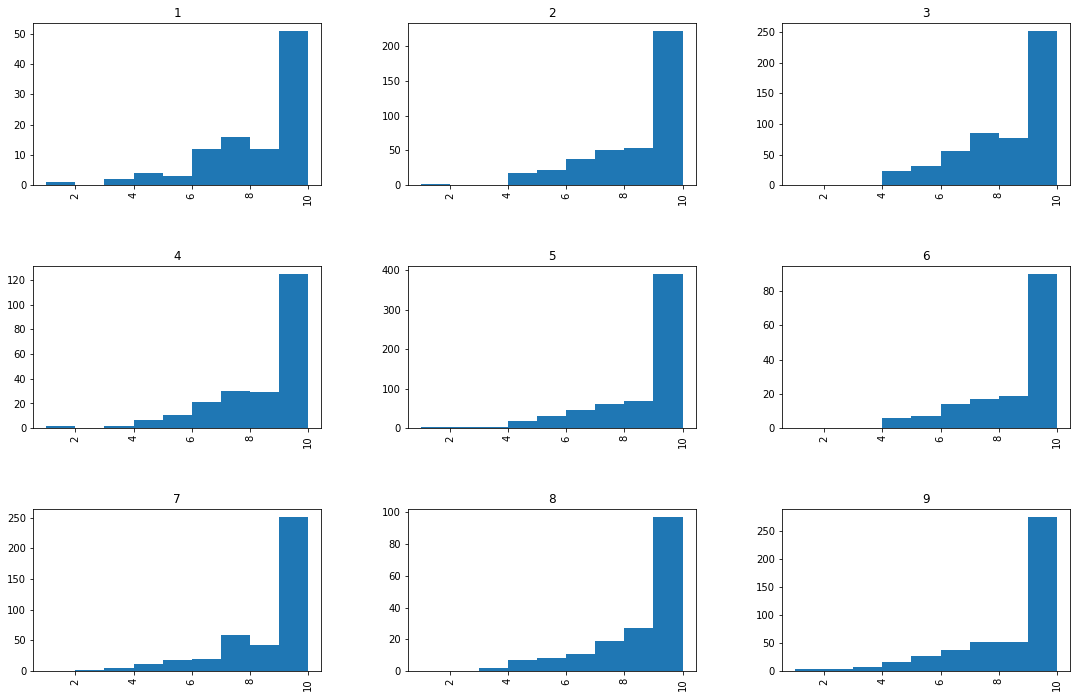

In [17]:
var='VAEN_R_15'
dfc=df[[splitVar,var]].dropna()
dfc[var]=dfc[var].apply(pd.to_numeric, errors='ignore')
dfc.hist(column=var,by=splitVar,bins=range(1,11),figsize=(18, 12))

In [18]:
allDist['VAEN_R_15']

1.0     0.004206
10.0    0.378195
2.0     0.003235
3.0     0.007441
4.0     0.035264
5.0     0.051116
6.0     0.081851
7.0     0.126173
8.0     0.122938
9.0     0.189583
Name: VAEN_R_15, dtype: float64

In [19]:
np.log(np.sqrt(probDist['5']['VAEN_R_15']*allDist['VAEN_R_15']).sum())

-0.0023830735835711869

Calculate distances relative to segment average

In [149]:
df=dfList[0]
varList=['Make','Make_Series','Segment','VEXT_R_1','VEXT_R_2','VEXT_R_3','VEXT_R_4','VEXT_R_5','VEXT_R_6','VEXT_R_7','VINT_R_1','VINT_R_2','VINT_R_3','VINT_R_4','VINT_R_5','VINT_R_6','VINT_R_7','VINT_R_8','VINT_R_9','VINT_R_10','VINT_R_11','VSS_R_1','VSS_R_2','VSS_R_3','VSS_R_4','VSS_R_5','VSS_R_7','VSS_R_9','VSS_R_10','VSS_R_11','VSS_R_12','VAEN_R_1','VAEN_R_2','VAEN_R_3','VAEN_R_4','VAEN_R_5','VAEN_R_6','VAEN_R_7','VAEN_R_8','VAEN_R_9','VAEN_R_10','VAEN_R_11','VAEN_R_12','VAEN_R_13','VAEN_R_14','VAEN_R_15','VAEN_R_16','VAEN_R_17','VSEAT_R_1','VSEAT_R_2','VSEAT_R_3','VSEAT_R_4','VSEAT_R_5','VSEAT_R_6','VSEAT_R_7','VSEAT_R_8','VSEAT_R_9','VSEAT_R_10','VSEAT_R_11','VSEAT_R_12','VHVAC_R_1','VHVAC_R_2','VHVAC_R_3','VHVAC_R_4','VHVAC_R_5','VHVAC_R_6','VHVAC_R_7','VDRD_R_1','VDRD_R_2','VDRD_R_3','VDRD_R_4','VDRD_R_5','VDRD_R_6','VDRD_R_7','VDRD_R_8','VDRD_R_9','VDRD_R_10','VENT_R_1','VENT_R_2','VENT_R_3','VENT_R_4','VENT_R_5','VENT_R_6','VVDS_R_1','VVDS_R_2','VVDS_R_3','VVDS_R_4','VVDS_R_5','VVDS_R_6','VVDS_R_7','VVDS_R_8','VFUEL_R_1','VFUEL_R_2','VFUEL_R_3']
dfs=df[varList].applymap(str)

In [150]:
probDist={}
temp=dfs.iloc[:,1:].apply(pd.value_counts).drop('nan')
probDist['all']=temp/temp.sum().T
usedVehicleList = []
#temp = dfs[dfs['Make_Premium_Non_Premium']=='Non-Premium'].iloc[:,1:].apply(pd.value_counts).drop('nan')
#probDist['NonPremium']=temp.value_counts()/temp.sum()
#temp = dfs[dfs['Make_Premium_Non_Premium']=='Premium'].iloc[:,1:].apply(pd.value_counts).drop('nan')
#probDist['Premium']=temp.value_counts()/temp.sum()
for m in dfs['Make_Series'].unique():
    temp = dfs[dfs['Make_Series']==m].iloc[:,3:].apply(pd.value_counts)
    if 'nan' in list(temp.index):
        temp=temp.drop('nan')
    if temp.sum().max() >= 50:
        for a in list(temp.columns):
            if temp[a].sum() < 50:
                temp = temp.drop(a, axis=1)
        probDist[m]=(temp/temp.sum()).fillna(0)
        usedVehicleList.append(m)
    else:
        print(m)
        
for m in dfs['Segment'].unique():
    temp = dfs[dfs['Segment']==m].iloc[:,3:].apply(pd.value_counts)
    if 'nan' in list(temp.index):
        temp=temp.drop('nan')
    if temp.sum().max() >= 50:
        for a in list(temp.columns):
            if temp[a].sum() < 50:
                temp = temp.drop(a, axis=1)
        probDist[m]=(temp/temp.sum()).fillna(0)
    else:
        print(m)

Audi allroad
BMW Z4
Cadillac ELR
Honda CR-Z
Hyundai Equus
Kia Cadenza
Mercedes-Benz G-Class
Mercedes-Benz SL-Class
MINI Paceman
Mercedes-Benz Metris
Mercedes-Benz AMG GT
Mitsubishi i-MiEV
Nissan GT-R
Toyota Mirai
Volvo S80
Dodge Viper
Ram ProMaster City
Ford Taurus
Hyundai Genesis Coupe
Mercedes-Benz B-Class
Jaguar XJ
BMW i8
Mitsubishi Lancer
Infiniti Q70
Kia K900
Lincoln MKS
Infiniti QX60
Lincoln MKT
Toyota Yaris
BMW i3
Chevrolet SS
Fiat 500L
Nissan Quest


In [133]:
probDist['Nissan Sentra']

,VEXT_R_1,VEXT_R_2,VEXT_R_3,VEXT_R_4,VEXT_R_5,VEXT_R_6,VEXT_R_7,VINT_R_1,VINT_R_2,VINT_R_3,...,VVDS_R_2,VVDS_R_3,VVDS_R_4,VVDS_R_5,VVDS_R_6,VVDS_R_7,VVDS_R_8,VFUEL_R_1,VFUEL_R_2,VFUEL_R_3
1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10.0,0.482143,0.500000,0.410714,0.446429,0.517857,0.428571,0.500000,0.428571,0.375000,0.410714,...,0.517857,0.392857,0.446429,0.436364,0.375000,0.482143,0.446429,0.392857,0.321429,0.375000
11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.017857,0.000000,...,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.017857,0.000000,0.017857
4.0,0.053571,0.053571,0.053571,0.053571,0.035714,0.053571,0.053571,0.035714,0.071429,0.053571,...,0.071429,0.107143,0.071429,0.054545,0.071429,0.107143,0.053571,0.035714,0.053571,0.035714
5.0,0.017857,0.017857,0.017857,0.035714,0.000000,0.035714,0.000000,0.035714,0.000000,0.017857,...,0.017857,0.053571,0.017857,0.054545,0.053571,0.035714,0.053571,0.035714,0.035714,0.035714
6.0,0.107143,0.107143,0.125000,0.089286,0.107143,0.089286,0.107143,0.053571,0.071429,0.053571,...,0.017857,0.035714,0.053571,0.072727,0.107143,0.053571,0.053571,0.071429,0.089286,0.071429
7.0,0.089286,0.089286,0.125000,0.178571,0.142857,0.107143,0.107143,0.107143,0.125000,0.160714,...,0.214286,0.142857,0.142857,0.163636,0.142857,0.142857,0.160714,0.178571,0.232143,0.160714
8.0,0.142857,0.107143,0.107143,0.053571,0.071429,0.125000,0.071429,0.071429,0.160714,0.107143,...,0.035714,0.053571,0.053571,0.072727,0.071429,0.089286,0.053571,0.107143,0.089286,0.053571


In [23]:
vList=list(probDist.keys())
nRows=len(vList)
distanceMatrix = pd.DataFrame(np.zeros((nRows, nRows)),index=vList, columns=vList)

In [151]:
#calculate distance matrix
from itertools import combinations
distanceMatrix = pd.DataFrame(np.zeros((nRows, nRows)),index=vList, columns=vList)
ks=list(probDist.keys())
for k1, k2 in combinations(ks, 2):
#k1='Toyota Camry'
#k2='Nissan Altima'
    t=np.sqrt(probDist[k1]*probDist[k2]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    d=np.sqrt(np.dot(d,d))
    distanceMatrix.loc[k1,k2]=d
    distanceMatrix.loc[k2,k1]=d

In [25]:
distFromSegment = pd.DataFrame(np.zeros((len(usedVehicleList), 3)), columns=['Segment','APEAL Score','Distance'],index=usedVehicleList)

In [26]:
for k in usedVehicleList:
    vehdf=df[df['Make_Series']==k]['APEAL_Index'].dropna()
    distFromSegment.loc[k,'APEAL Score'] = vehdf.sum()/vehdf.count()
    currentSegment = df[df['Make_Series']==k]['Segment'].iloc[0]
    distFromSegment.loc[k,'Segment'] = currentSegment
    distFromSegment.loc[k,'Distance'] = distanceMatrix.loc[k,currentSegment]

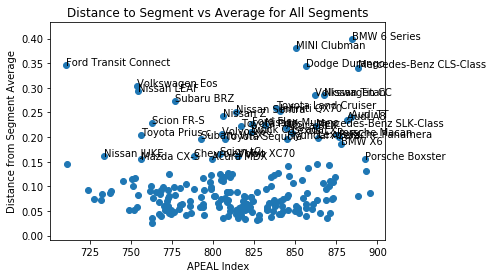

In [27]:
plt.scatter(distFromSegment['APEAL Score'],distFromSegment['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance to Segment vs Average for All Segments')
for txt in list(distFromSegment.index):
    if distFromSegment.loc[txt,'Distance']>.15:
        plt.annotate(txt, (distFromSegment.loc[txt,'APEAL Score'],distFromSegment.loc[txt,'Distance']))

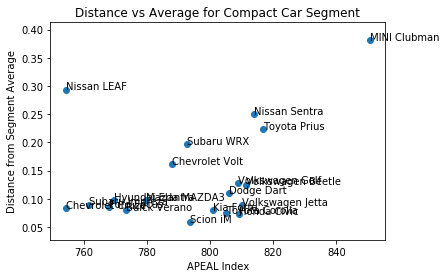

In [28]:
tempSegment = 'Compact Car'
singelSegDistance = distFromSegment[distFromSegment['Segment']==tempSegment]
#fig, ax = plt.subplots()
plt.scatter(singelSegDistance['APEAL Score'],singelSegDistance['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Compact Car Segment')
for txt in list(singelSegDistance.index):
    if singelSegDistance.loc[txt,'Distance']>0:
        plt.annotate(txt, (singelSegDistance.loc[txt,'APEAL Score'],singelSegDistance.loc[txt,'Distance']))

In [29]:
vardist = []
for k in vList:
    t=np.sqrt(probDist[k]*probDist[tempSegment]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    vardist.append(d)

In [30]:
vardist

[VAEN_R_1      0.013673
 VAEN_R_12     0.024138
 VAEN_R_13     0.016765
 VAEN_R_16     0.011462
 VAEN_R_17     0.011330
 VAEN_R_2      0.020200
 VAEN_R_3      0.010361
 VAEN_R_4      0.018369
 VAEN_R_5      0.013842
 VAEN_R_6      0.012575
 VDRD_R_1      0.028718
 VDRD_R_10     0.011739
 VDRD_R_2      0.008235
 VDRD_R_3      0.013661
 VDRD_R_4      0.009066
 VDRD_R_5      0.027246
 VDRD_R_6      0.004072
 VDRD_R_7      0.025233
 VDRD_R_8      0.036758
 VDRD_R_9      0.018591
 VENT_R_1      0.019102
 VENT_R_2      0.020765
 VENT_R_3      0.006364
 VENT_R_4      0.009169
 VENT_R_5      0.008494
 VENT_R_6      0.006048
 VEXT_R_1      0.024758
 VEXT_R_2      0.025815
 VEXT_R_3      0.024294
 VEXT_R_4      0.012848
                 ...   
 VINT_R_7      0.010225
 VINT_R_8      0.035706
 VINT_R_9      0.008413
 VSEAT_R_1     0.006593
 VSEAT_R_10    0.012063
 VSEAT_R_11    0.038949
 VSEAT_R_12    0.011497
 VSEAT_R_2     0.012158
 VSEAT_R_3     0.025456
 VSEAT_R_4     0.009879
 VSEAT_R_5     0

In [31]:
varListdf=pd.DataFrame(vardist).fillna(0)#.drop(['Make_Series','Segment'],axis=1)
varListdf.index = vList

In [32]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Nissan LEAF'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()

In [33]:
tempdf.sort_values(by=vehicle, ascending=False)

,APEAL Score,Nissan LEAF
VAEN_R_14,5.829545,0.084601
VENT_R_4,8.991228,0.079333
VENT_R_2,9.086614,0.078862
VEXT_R_3,6.772727,0.062549
VENT_R_5,9.125749,0.059328
VEXT_R_7,7.296089,0.052594
VEXT_R_1,7.017045,0.051626
VEXT_R_2,7.090909,0.050216
VAEN_R_12,6.138298,0.045790
VINT_R_6,6.943820,0.042118


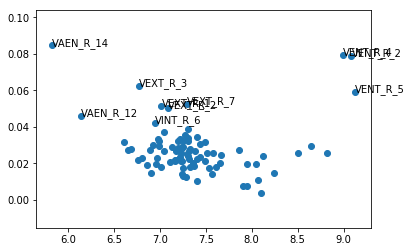

In [34]:
#fig, ax = plt.subplots()
plt.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.04:
        plt.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

In [152]:
vardist = []
for k in vList:
    t=np.sqrt(probDist[k]*probDist[tempSegment]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    vardist.append(d)

In [153]:
varListdf=pd.DataFrame(vardist).fillna(0)#.drop(['Make_Series','Segment'],axis=1)
varListdf.index = vList

In [154]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Nissan Sentra'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()

In [155]:
tempdf.sort_values(by=vehicle, ascending=False)

,APEAL Score,Nissan Sentra
VFUEL_R_1,8.285714,0.098792
VFUEL_R_3,8.357143,0.098408
VFUEL_R_2,8.089286,0.075979
VVDS_R_2,8.571429,0.052994
VSEAT_R_3,8.267857,0.044965
VDRD_R_1,8.339286,0.043598
VVDS_R_7,8.267857,0.041319
VDRD_R_6,8.185185,0.040963
VEXT_R_7,8.625000,0.039515
VSEAT_R_8,8.160714,0.039080


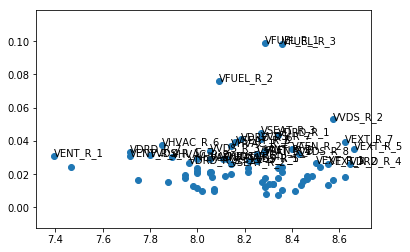

In [156]:
fig, ax = plt.subplots()
ax.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.025:
        ax.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000796D9198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000082DB8C50>]], dtype=object)

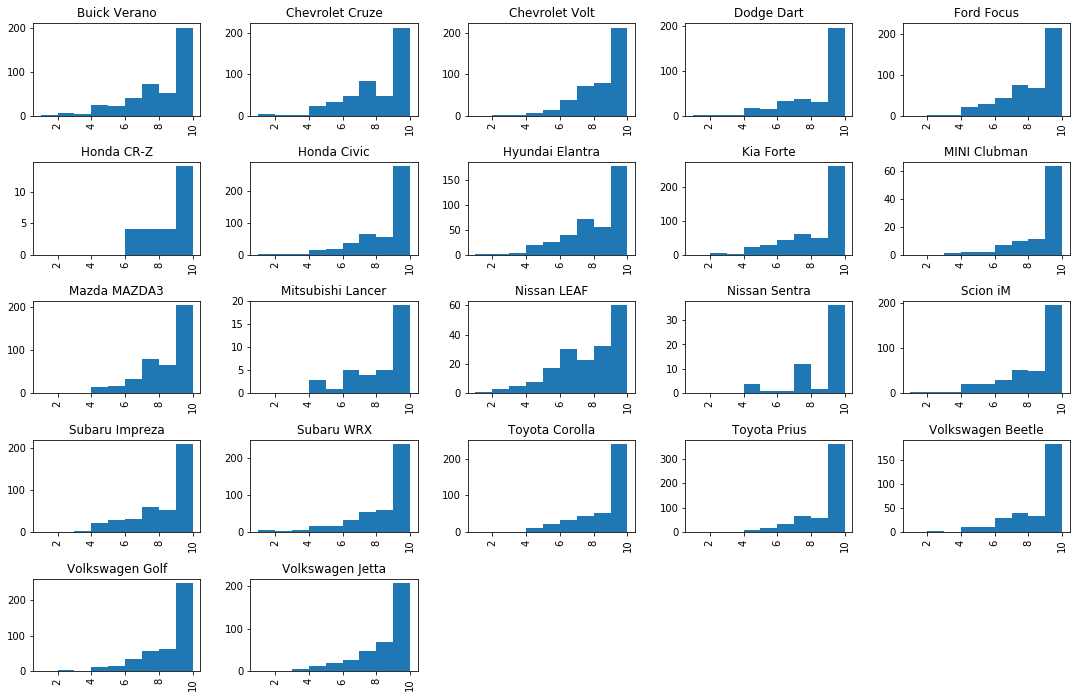

In [38]:
df=dfList[0][['Make_Series','Segment','VVDS_R_2']]
df[df['Segment']=='Compact Car'].hist(by='Make_Series',bins=range(1,11), figsize=(18, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000426FCB00>]], dtype=object)

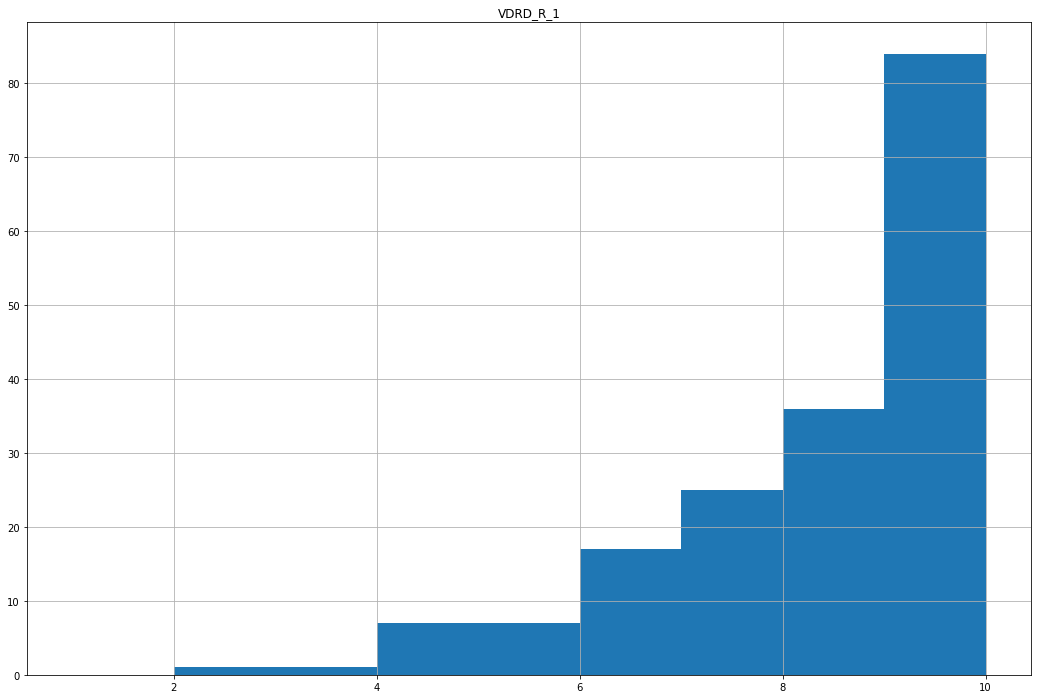

In [39]:
df=dfList[0][['Make_Series','VDRD_R_1']]
df[df['Make_Series']=='Nissan LEAF'].hist(bins=range(1,11), figsize=(18, 12))

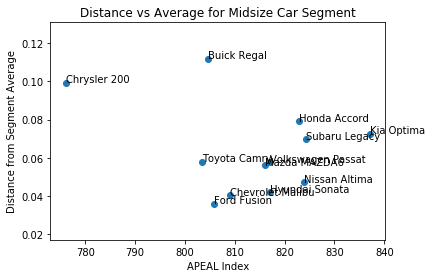

In [157]:
tempSegment = 'Midsize Car'
singelSegDistance = distFromSegment[distFromSegment['Segment']==tempSegment]
#fig, ax = plt.subplots()
plt.scatter(singelSegDistance['APEAL Score'],singelSegDistance['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Midsize Car Segment')
for txt in list(singelSegDistance.index):
    if singelSegDistance.loc[txt,'Distance']>0:
        plt.annotate(txt, (singelSegDistance.loc[txt,'APEAL Score'],singelSegDistance.loc[txt,'Distance']))

In [158]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vardist = []
for k in vList:
    t=np.sqrt(probDist[k]*probDist[tempSegment]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    vardist.append(d)

varListdf=pd.DataFrame(vardist).fillna(0)#.drop(['Make_Series','Segment'],axis=1)
varListdf.index = vList

vehicle = 'Nissan Altima'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()
tempdf.sort_values(by=vehicle, ascending=False)

,APEAL Score,Nissan Altima
VSS_R_5,8.283951,0.015813
VSS_R_1,8.163366,0.012006
VSEAT_R_6,8.300292,0.010676
VAEN_R_7,8.052288,0.010249
VSS_R_10,8.604478,0.009696
VAEN_R_9,8.151724,0.009003
VEXT_R_4,8.491358,0.008447
VFUEL_R_1,8.106173,0.008310
VFUEL_R_2,8.238095,0.008219
VFUEL_R_3,8.197044,0.007678


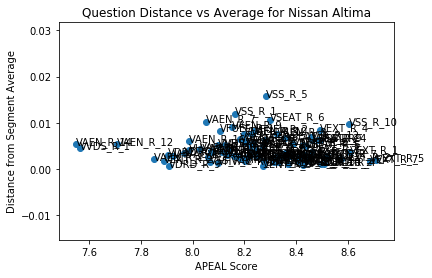

In [160]:
#fig, ax = plt.subplots()
plt.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
plt.xlabel('APEAL Score')
plt.ylabel('Distance from Segment Average')
plt.title('Question Distance vs Average for Nissan Altima')
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.0:
        plt.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000008A09C0B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000825904E0>]], dtype=object)

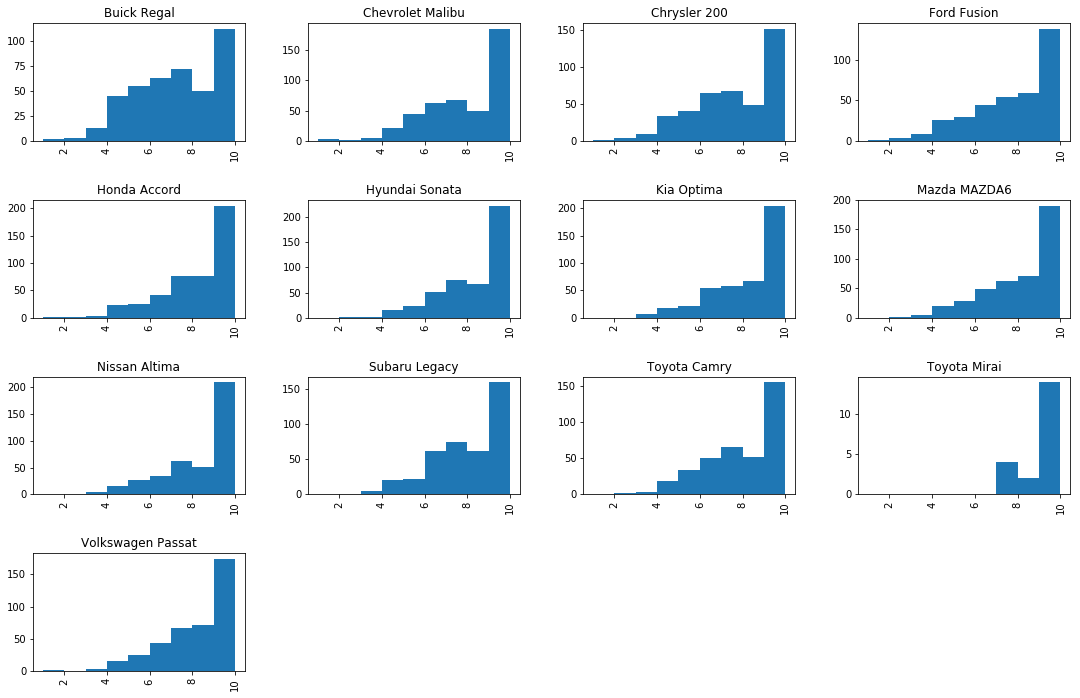

In [142]:
df=dfList[0][['Make_Series','Segment','VFUEL_R_1']]
df[df['Segment']==tempSegment].hist(by='Make_Series',bins=range(1,11), figsize=(18, 12))

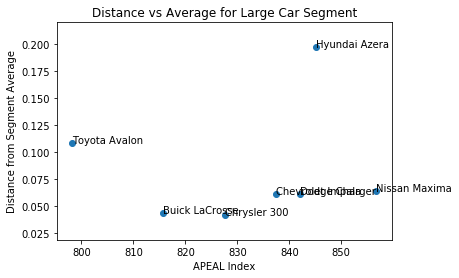

In [165]:
tempSegment = 'Large Car'
singelSegDistance = distFromSegment[distFromSegment['Segment']==tempSegment]
#fig, ax = plt.subplots()
plt.scatter(singelSegDistance['APEAL Score'],singelSegDistance['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Large Car Segment')
for txt in list(singelSegDistance.index):
    if singelSegDistance.loc[txt,'Distance']>0:
        plt.annotate(txt, (singelSegDistance.loc[txt,'APEAL Score'],singelSegDistance.loc[txt,'Distance']))

In [167]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vardist = []
for k in vList:
    t=np.sqrt(probDist[k]*probDist[tempSegment]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    vardist.append(d)

varListdf=pd.DataFrame(vardist).fillna(0)#.drop(['Make_Series','Segment'],axis=1)
varListdf.index = vList

vehicle = 'Nissan Maxima'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()
tempdf.sort_values(by=vehicle, ascending=False)

,APEAL Score,Nissan Maxima
VENT_R_3,9.248188,0.015002
VINT_R_9,9.025180,0.014273
VEXT_R_1,9.120504,0.013041
VINT_R_1,9.061261,0.012254
VEXT_R_2,9.181655,0.012237
VAEN_R_14,7.688272,0.012201
VAEN_R_3,8.823105,0.012087
VINT_R_3,8.955036,0.011717
VINT_R_4,9.055755,0.011492
VENT_R_1,9.092058,0.010770


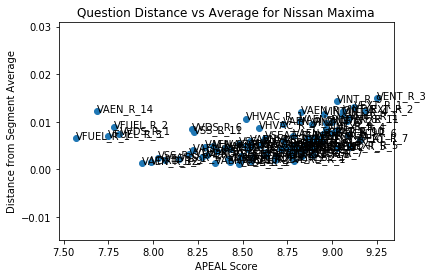

In [169]:
#fig, ax = plt.subplots()
plt.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
plt.xlabel('APEAL Score')
plt.ylabel('Distance from Segment Average')
plt.title('Question Distance vs Average for Nissan Maxima')
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.0:
        plt.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

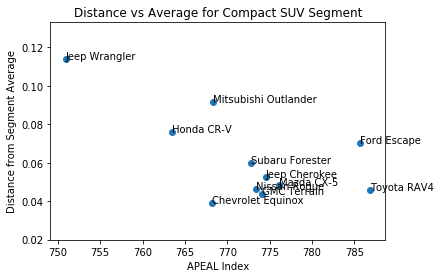

In [170]:
tempSegment = 'Compact SUV'
singelSegDistance = distFromSegment[distFromSegment['Segment']==tempSegment]
#fig, ax = plt.subplots()
plt.scatter(singelSegDistance['APEAL Score'],singelSegDistance['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Compact SUV Segment')
for txt in list(singelSegDistance.index):
    if singelSegDistance.loc[txt,'Distance']>0:
        plt.annotate(txt, (singelSegDistance.loc[txt,'APEAL Score'],singelSegDistance.loc[txt,'Distance']))

In [171]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vardist = []
for k in vList:
    t=np.sqrt(probDist[k]*probDist[tempSegment]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    vardist.append(d)

varListdf=pd.DataFrame(vardist).fillna(0)#.drop(['Make_Series','Segment'],axis=1)
varListdf.index = vList

vehicle = 'Nissan Rogue'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()
tempdf.sort_values(by=vehicle, ascending=False)

,APEAL Score,Nissan Rogue
VAEN_R_8,7.968127,0.017976
VSS_R_7,7.953488,0.017939
VAEN_R_2,7.826196,0.010497
VEXT_R_3,8.153652,0.007481
VENT_R_2,7.055696,0.006941
VHVAC_R_4,7.693467,0.006487
VAEN_R_6,7.957393,0.006300
VENT_R_1,7.342569,0.006150
VAEN_R_13,7.949062,0.006073
VSS_R_12,8.052632,0.006069


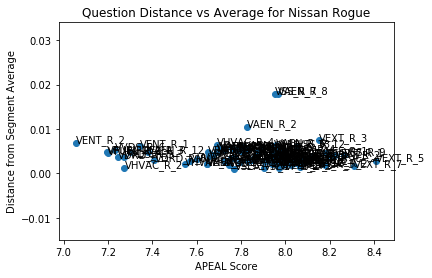

In [172]:
#fig, ax = plt.subplots()
plt.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
plt.xlabel('APEAL Score')
plt.ylabel('Distance from Segment Average')
plt.title('Question Distance vs Average for Nissan Rogue')
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.0:
        plt.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

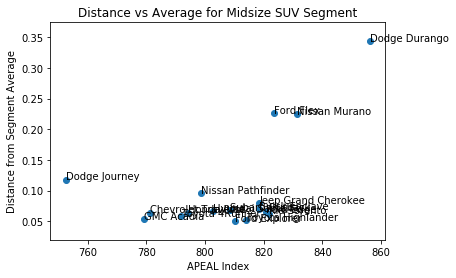

In [174]:
tempSegment = 'Midsize SUV'
singelSegDistance = distFromSegment[distFromSegment['Segment']==tempSegment]
#fig, ax = plt.subplots()
plt.scatter(singelSegDistance['APEAL Score'],singelSegDistance['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Midsize SUV Segment')
for txt in list(singelSegDistance.index):
    if singelSegDistance.loc[txt,'Distance']>0:
        plt.annotate(txt, (singelSegDistance.loc[txt,'APEAL Score'],singelSegDistance.loc[txt,'Distance']))

In [175]:
vardist = []
for k in vList:
    t=np.sqrt(probDist[k]*probDist[tempSegment]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    vardist.append(d)

In [176]:
varListdf=pd.DataFrame(vardist).fillna(0)#.drop(['Make_Series','Segment'],axis=1)
varListdf.index = vList

In [180]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Nissan Murano'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()#.drop('DEMO_INCM_1', axis=1)
tempdf.sort_values(by=vehicle, ascending=False)

,APEAL Score,Nissan Murano
VINT_R_7,8.738095,0.046126
VSEAT_R_11,8.618421,0.044555
VSEAT_R_3,8.843373,0.044480
VSEAT_R_5,8.880952,0.042065
VINT_R_11,8.940476,0.041621
VEXT_R_2,8.928571,0.039592
VINT_R_10,8.821429,0.039268
VINT_R_5,8.702381,0.038488
VSEAT_R_2,8.964286,0.037128
VINT_R_9,8.738095,0.036138


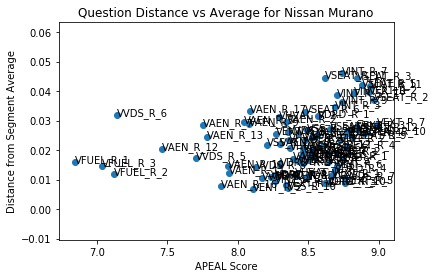

In [181]:
#fig, ax = plt.subplots()
plt.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
plt.xlabel('APEAL Score')
plt.ylabel('Distance from Segment Average')
plt.title('Question Distance vs Average for Nissan Murano')
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.0:
        plt.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

In [183]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Nissan Pathfinder'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()#.drop('DEMO_INCM_1', axis=1)
tempdf.sort_values(by=vehicle, ascending=False)

,APEAL Score,Nissan Pathfinder
VAEN_R_7,7.405063,0.032955
VAEN_R_9,7.697368,0.026748
VAEN_R_10,8.064935,0.026734
VSS_R_7,8.000000,0.021377
VAEN_R_11,7.756098,0.019542
VAEN_R_5,7.466102,0.018982
VSS_R_4,6.975610,0.014880
VSS_R_5,8.028369,0.013425
VAEN_R_3,7.929078,0.013244
VINT_R_10,8.326241,0.013202


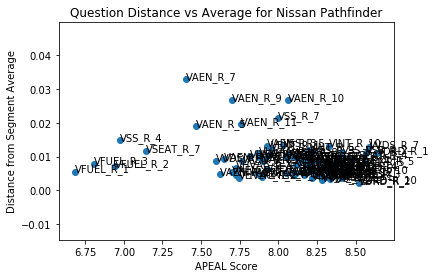

In [185]:
#fig, ax = plt.subplots()
plt.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
plt.xlabel('APEAL Score')
plt.ylabel('Distance from Segment Average')
plt.title('Question Distance vs Average for Nissan Pathfinder')
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.0:
        plt.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000075A08CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000079585DD8>]], dtype=object)

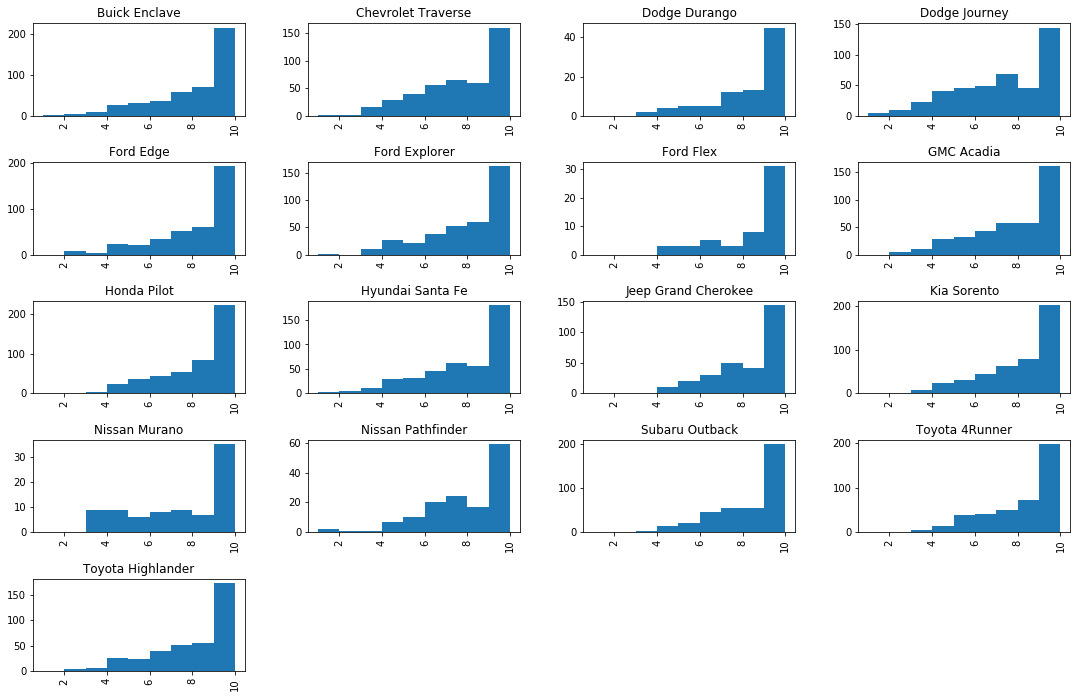

In [48]:
df=dfList[0][['Make_Series','Segment','VVDS_R_6']]
df[df['Segment']==tempSegment].hist(by='Make_Series',bins=range(1,11), figsize=(18, 12))

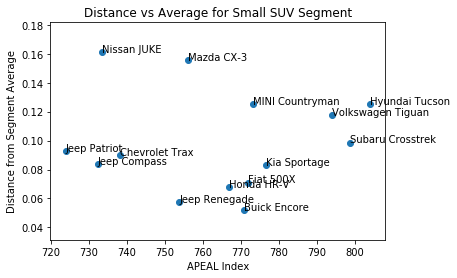

In [200]:
tempSegment = 'Small SUV'
singelSegDistance = distFromSegment[distFromSegment['Segment']==tempSegment]
#fig, ax = plt.subplots()
plt.scatter(singelSegDistance['APEAL Score'],singelSegDistance['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Small SUV Segment')
for txt in list(singelSegDistance.index):
    if singelSegDistance.loc[txt,'Distance']>0:
        plt.annotate(txt, (singelSegDistance.loc[txt,'APEAL Score'],singelSegDistance.loc[txt,'Distance']))

In [201]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vardist = []
for k in vList:
    t=np.sqrt(probDist[k]*probDist[tempSegment]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    vardist.append(d)

varListdf=pd.DataFrame(vardist).fillna(0)#.drop(['Make_Series','Segment'],axis=1)
varListdf.index = vList

In [202]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Nissan JUKE'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()
tempdf.sort_values(by=vehicle, ascending=False)

,APEAL Score,Nissan JUKE
VSS_R_3,5.488889,0.065771
VSEAT_R_6,6.576923,0.041179
VSEAT_R_4,6.848485,0.031925
VINT_R_6,7.060606,0.027246
VINT_R_4,7.181818,0.026088
VVDS_R_7,7.755102,0.025828
VENT_R_4,7.368421,0.025058
VHVAC_R_5,6.919192,0.024516
VINT_R_3,7.050505,0.023102
VDRD_R_9,7.887755,0.022942


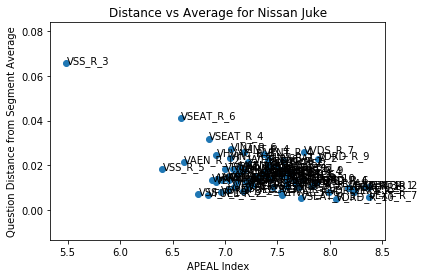

In [203]:
#fig, ax = plt.subplots()
plt.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
plt.xlabel('APEAL Index')
plt.ylabel('Question Distance from Segment Average')
plt.title('Distance vs Average for Nissan Juke')
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.0:
        plt.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000079B170B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000007C10EA58>]], dtype=object)

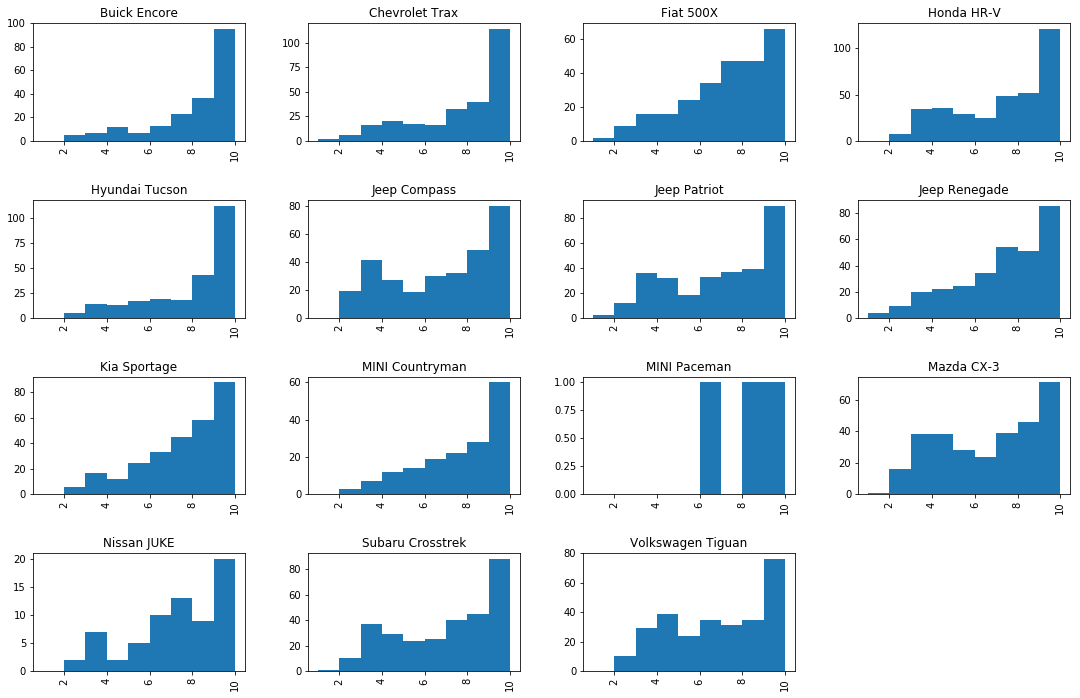

In [52]:
df=dfList[0][['Make_Series','Segment','Demo_AgeBucket']]
df[df['Segment']==tempSegment].hist(by='Make_Series',bins=range(1,11), figsize=(18, 12))

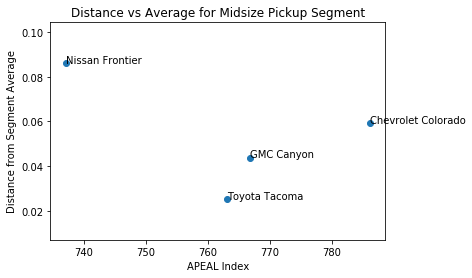

In [204]:
tempSegment = 'Midsize Pickup'
singelSegDistance = distFromSegment[distFromSegment['Segment']==tempSegment]
#fig, ax = plt.subplots()
plt.scatter(singelSegDistance['APEAL Score'],singelSegDistance['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Midsize Pickup Segment')
for txt in list(singelSegDistance.index):
    if singelSegDistance.loc[txt,'Distance']>0:
        plt.annotate(txt, (singelSegDistance.loc[txt,'APEAL Score'],singelSegDistance.loc[txt,'Distance']))

In [205]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vardist = []
for k in vList:
    t=np.sqrt(probDist[k]*probDist[tempSegment]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    vardist.append(d)

varListdf=pd.DataFrame(vardist).fillna(0)#.drop(['Make_Series','Segment'],axis=1)
varListdf.index = vList

In [206]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Nissan Frontier'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()
tempdf.sort_values(by=vehicle, ascending=False)

,APEAL Score,Nissan Frontier
VAEN_R_8,7.403509,0.030282
VAEN_R_9,7.200000,0.024486
VFUEL_R_2,5.956311,0.023815
VAEN_R_14,6.683333,0.023201
VFUEL_R_3,5.792363,0.022711
VFUEL_R_1,5.599520,0.022341
VAEN_R_7,7.140351,0.021268
VAEN_R_10,7.543860,0.020514
VDRD_R_3,7.071599,0.016620
VAEN_R_4,7.262255,0.011320


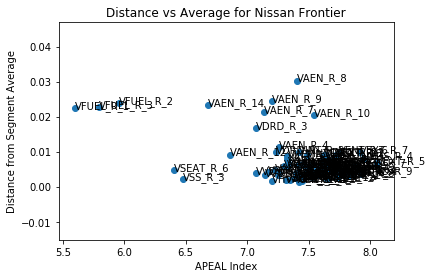

In [207]:
#fig, ax = plt.subplots()
plt.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Nissan Frontier')
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.0:
        plt.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000008507B710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000740358D0>]], dtype=object)

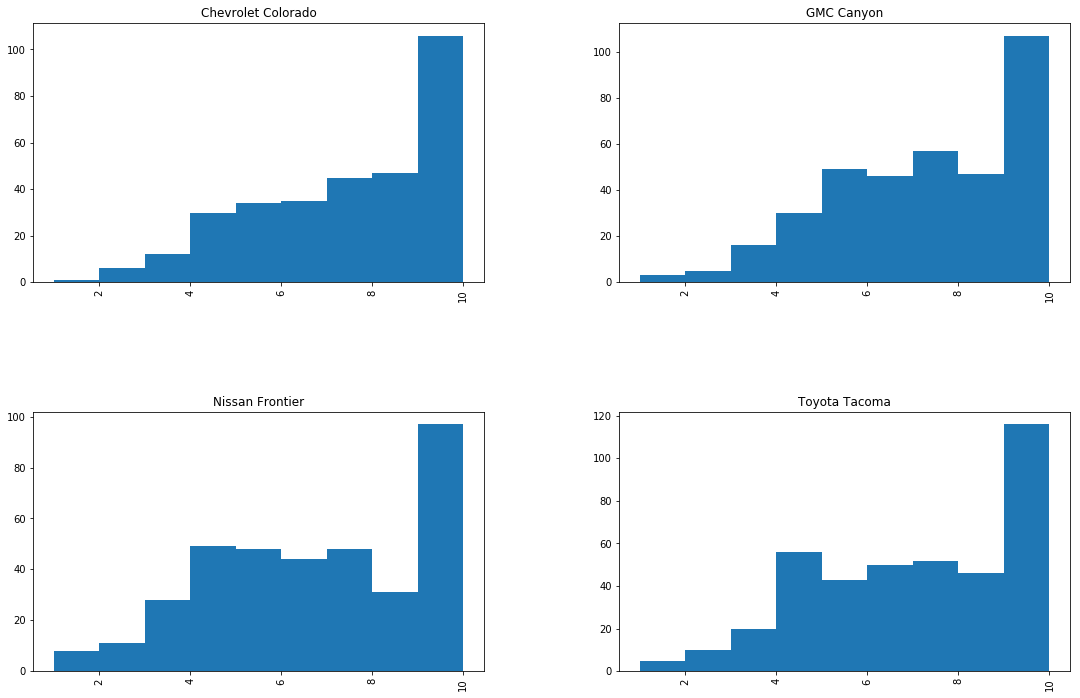

In [56]:
df=dfList[0][['Make_Series','Segment','VSEAT_R_6']]
df[df['Segment']==tempSegment].hist(by='Make_Series',bins=range(1,11), figsize=(18, 12))

In [57]:
distFromSegment['Segment'].unique()

array(['Midsize Premium Car', 'Large Premium SUV', 'Midsize Premium SUV',
       'Large SUV', 'Midsize Pickup', 'Midsize Premium Sporty Car',
       'Compact Car', 'Compact SUV', 'Midsize Car', 'Large Car',
       'Large Light Duty Pickup', 'Small Car', 'Midsize SUV',
       'Large Heavy Duty Pickup', 'Small SUV', 'Minivan',
       'Midsize Sporty Car', 'Compact Premium Sporty Car',
       'Compact Premium SUV', 'Small Premium Car', 'Compact Premium Car',
       'Compact Sporty Car', 'Compact Multi-Purpose Vehicle',
       'Small Premium SUV', 'Large Premium Car', 'City Car'], dtype=object)

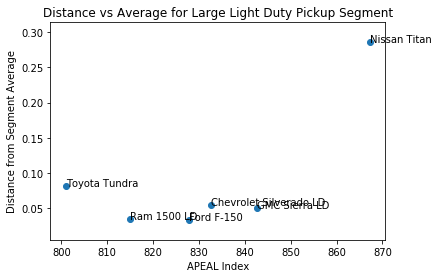

In [196]:
tempSegment = 'Large Light Duty Pickup'
singelSegDistance = distFromSegment[distFromSegment['Segment']==tempSegment]
#fig, ax = plt.subplots()
plt.scatter(singelSegDistance['APEAL Score'],singelSegDistance['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Large Light Duty Pickup Segment')
for txt in list(singelSegDistance.index):
    if singelSegDistance.loc[txt,'Distance']>0:
        plt.annotate(txt, (singelSegDistance.loc[txt,'APEAL Score'],singelSegDistance.loc[txt,'Distance']))

In [197]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vardist = []
for k in vList:
    t=np.sqrt(probDist[k]*probDist[tempSegment]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    vardist.append(d)

varListdf=pd.DataFrame(vardist).fillna(0)#.drop(['Make_Series','Segment'],axis=1)
varListdf.index = vList

In [198]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Nissan Titan'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()
tempdf.sort_values(by=vehicle, ascending=False)

,APEAL Score,Nissan Titan
VSEAT_R_9,9.101124,0.061587
VSEAT_R_5,9.078652,0.059172
VAEN_R_1,9.168539,0.050581
VDRD_R_4,9.044944,0.050262
VSEAT_R_12,9.011236,0.048348
VSEAT_R_10,9.067416,0.043504
VINT_R_2,9.011236,0.042801
VAEN_R_6,8.988764,0.042699
VVDS_R_2,9.269663,0.042572
VINT_R_9,8.954545,0.042465


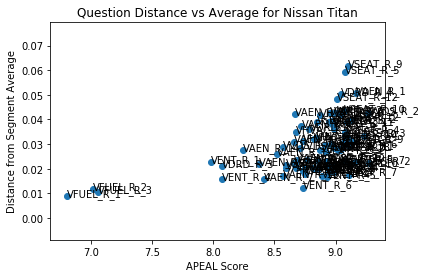

In [199]:
#fig, ax = plt.subplots()
plt.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
plt.xlabel('APEAL Score')
plt.ylabel('Distance from Segment Average')
plt.title('Question Distance vs Average for Nissan Titan')
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.0:
        plt.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000795E2AC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000007D7C2D68>]], dtype=object)

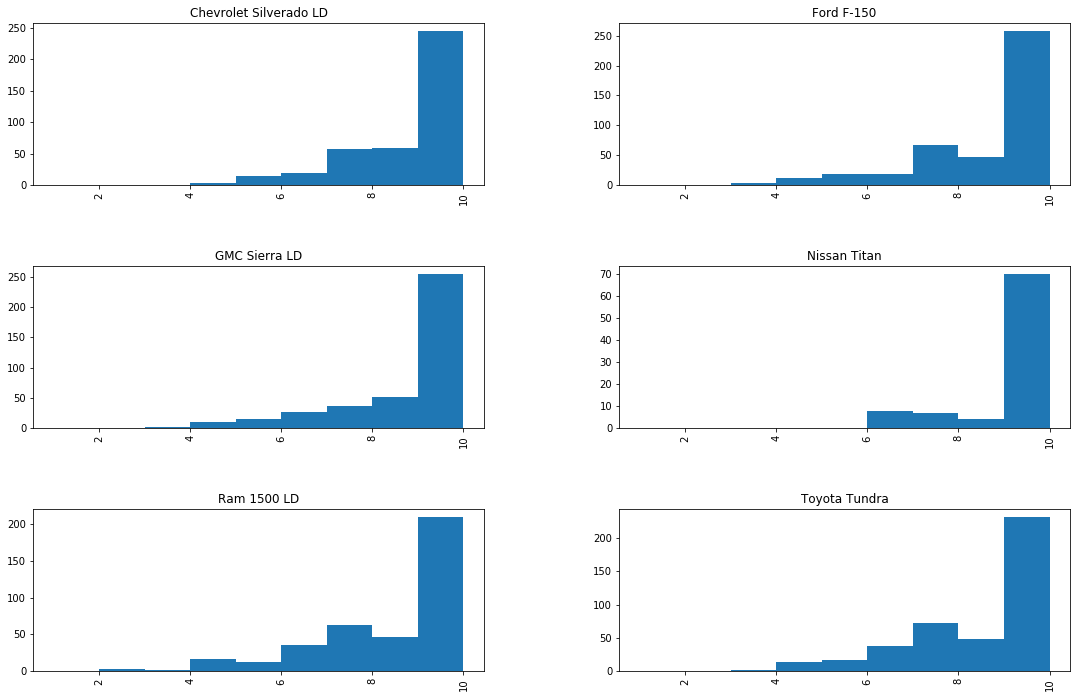

In [61]:
df=dfList[0][['Make_Series','Segment','VSEAT_R_5']]
df[df['Segment']==tempSegment].hist(by='Make_Series',bins=range(1,11), figsize=(18, 12))

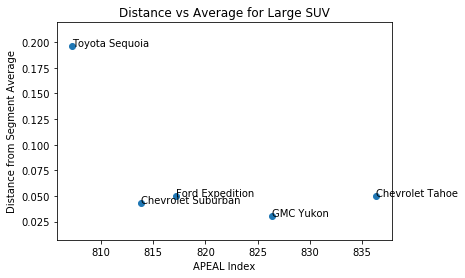

In [126]:
tempSegment = 'Large SUV'
singelSegDistance = distFromSegment[distFromSegment['Segment']==tempSegment]
#fig, ax = plt.subplots()
plt.scatter(singelSegDistance['APEAL Score'],singelSegDistance['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Large SUV')
for txt in list(singelSegDistance.index):
    if singelSegDistance.loc[txt,'Distance']>0:
        plt.annotate(txt, (singelSegDistance.loc[txt,'APEAL Score'],singelSegDistance.loc[txt,'Distance']))